<a href="https://colab.research.google.com/github/PrettyCharity/Bigquery/blob/main/Crypto_bitcoin_Bigquery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Google Cloud Credentials
import os
from google.cloud import bigquery
# Credentials and the path
credential_path = "key.json"
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = credential_path

In [2]:
#@title Accessing the crypto_bitcoin via bigquery object
client = bigquery.Client()
dataset_ref = client.dataset('crypto_bitcoin', project = 'bigquery-public-data')
dataset = client.get_dataset(dataset_ref)

In [4]:
#@title Exploring the tables of crypto_bitcoin
tables = client.list_tables(dataset)
for table in tables:
  print(table.table_id)

blocks
inputs
outputs
transactions


In [9]:
#@title Obtaining 'transactions' table
table_ref = dataset_ref.table('transactions')
table = client.get_table(table_ref)
preview = client.list_rows(table, max_results = 5).to_dataframe()
print('Table columns:\n\n')
print(preview.columns)

Table columns:


Index(['hash', 'size', 'virtual_size', 'version', 'lock_time', 'block_hash',
       'block_number', 'block_timestamp', 'block_timestamp_month',
       'input_count', 'output_count', 'input_value', 'output_value',
       'is_coinbase', 'fee', 'inputs', 'outputs'],
      dtype='object')


In [12]:
#@title Construct the SQL query to obtain transaction numbers per date
query = """
        WITH time AS
        (
          SELECT DATE(block_timestamp) AS trans_date
          FROM `bigquery-public-data.crypto_bitcoin.transactions`
        )
        SELECT COUNT(1) AS transactions, trans_date
        FROM time
        GROUP BY trans_date
        ORDER BY trans_date
        """


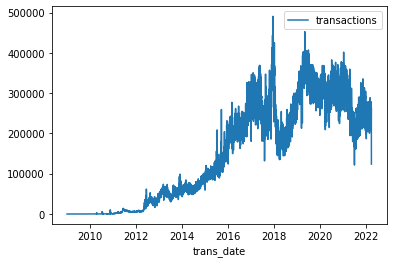

In [13]:
#@title Fetch data from the server and plot
# API request - run the query, and convert the results to a pandas DataFrame
query_job = client.query(query)
transactions_per_date = query_job.to_dataframe()

# Plot results
transactions_per_date.set_index('trans_date').plot()